In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [27]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

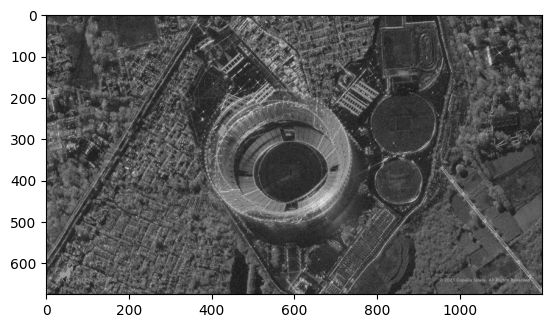

In [28]:
plt.imshow(image_gray, cmap="gray")

In [29]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[ 30,   0,   0, ...,   0,   0, 109],
       [  0,   4,  97, ...,  12, 133,   0],
       [ 68,   0, 255, ...,   0,   0,   1],
       ...,
       [  0,  70,   0, ..., 107,  78,  37],
       [  0,  76,   0, ...,   0, 150,   0],
       [  0,   0,   0, ...,  21,   0,  67]],
      shape=(675, 1200), dtype=uint8)

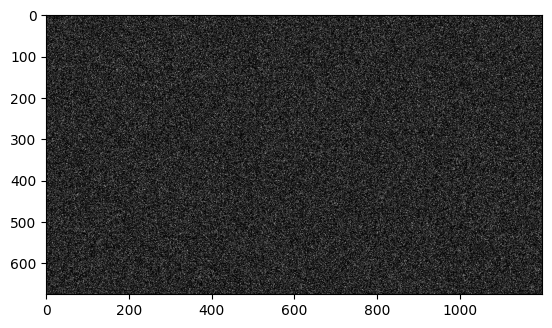

In [30]:
plt.imshow(noise_gauss, cmap="gray")

In [31]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [32]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [33]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

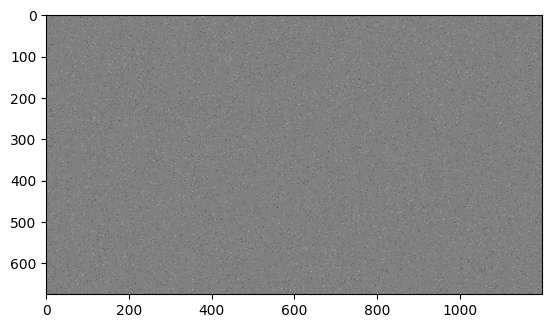

In [34]:
plt.imshow(bg_image, cmap="gray")

In [35]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

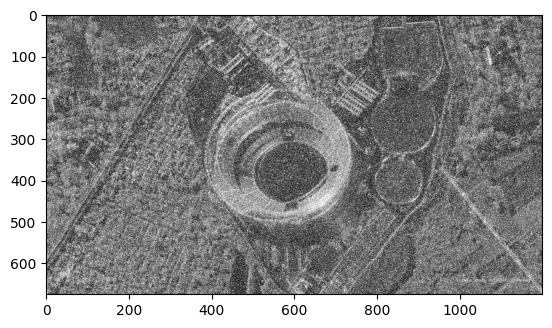

In [36]:
plt.imshow(image_noise_gauss, cmap="gray")

In [37]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4246.89160617284 0.18627040803306705


In [38]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [39]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [40]:
print(mse_gauss_median, ssim_gauss_median)

1037.8819148148148 0.4287699124773108


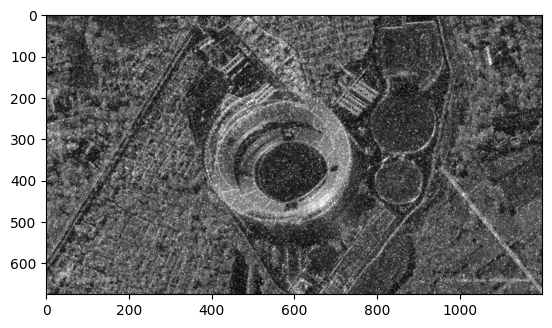

In [41]:
plt.imshow(image_gauss_median, cmap="gray")

In [42]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

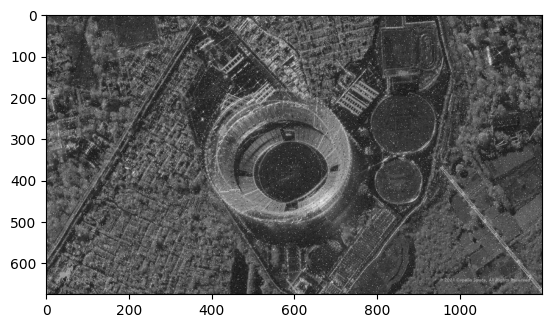

In [43]:
plt.imshow(image_sp, cmap="gray")

In [44]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

392.96113950617286 0.7185864590827835


In [45]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [46]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.83194567901235 0.8160252028517322


# Другие типы фильтров

In [47]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [48]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [49]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [50]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


/var/folders/lf/hx2sy17x5gj_mgpmwcqq1d080000gp/T/ipykernel_30252/164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


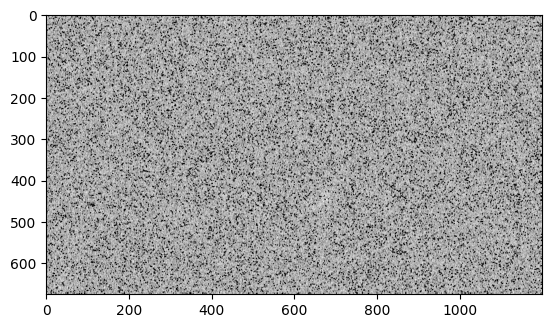

In [51]:
plt.imshow(res, cmap="gray")

In [52]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.894479012346 0.027384113992659515



# 2D свертка

In [105]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [106]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [127]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [128]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

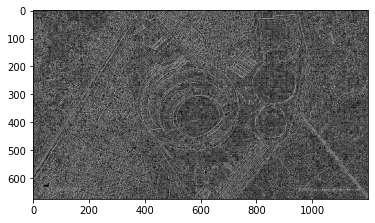

In [129]:
plt.imshow(image_lapl, cmap="gray")

In [ ]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

## 1. Зашумить изображение при помощи шума гаусса, постоянного шума.

In [17]:
image2 = cv2.imread('img.jpg')
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) 

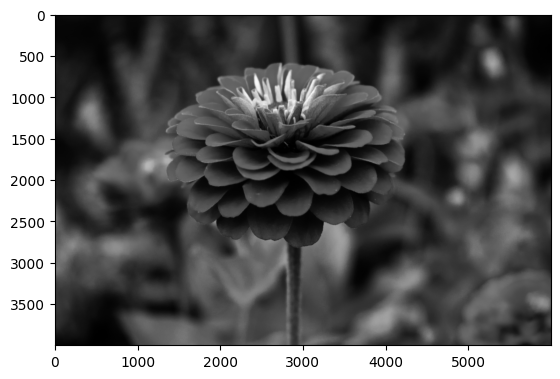

In [18]:
plt.imshow(image2_gray, cmap="gray")

In [19]:
mean = 0
stddev = 150
noise_gauss = np.zeros(image2_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0, 127, 118, ...,  28,   0,   0],
       [  0,   0,  71, ...,  74, 178,   0],
       [  0,  39,  16, ...,  91,   0, 152],
       ...,
       [  0,  13,  26, ...,   0,  84,   0],
       [185, 137,   0, ...,   0,   0,   0],
       [128,  82, 114, ...,   0,   0,   0]],
      shape=(4000, 6000), dtype=uint8)

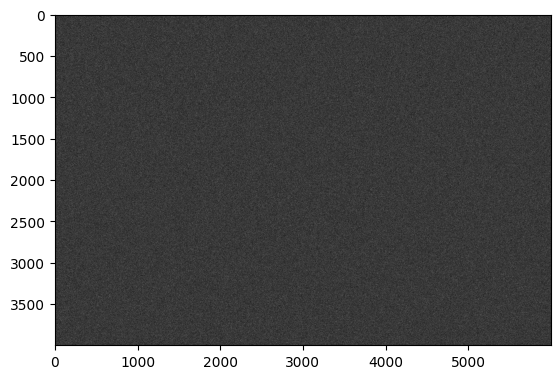

In [20]:
plt.imshow(noise_gauss, cmap="gray")

In [21]:
image2_noise_gauss = cv2.add(image2_gray,noise_gauss)

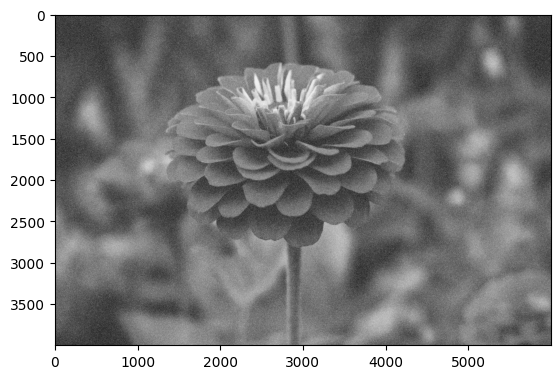

In [22]:
plt.imshow(image2_noise_gauss, cmap="gray")

In [24]:
permanent_noise = np.zeros(image2_gray.shape, np.int16)
cv2.randu(permanent_noise, 0, 50)

array([[41,  5, 33, ..., 30, 21, 23],
       [38,  0, 34, ..., 33, 11, 38],
       [11, 34,  2, ...,  6,  2, 40],
       ...,
       [19, 32, 15, ..., 48, 25, 11],
       [ 2, 14,  5, ..., 13,  1, 26],
       [13, 42, 10, ..., 15, 21, 18]], shape=(4000, 6000), dtype=int16)

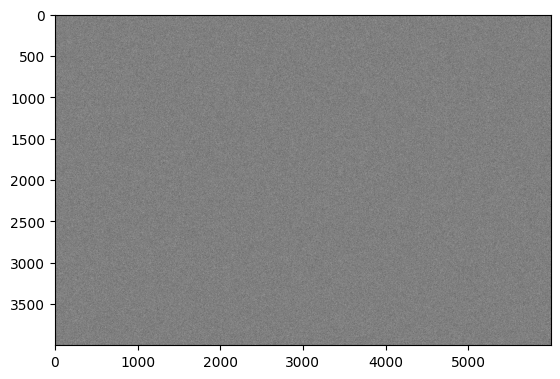

In [25]:
plt.imshow(permanent_noise, cmap="gray")

In [32]:
image2_const_noisy = cv2.add(image2_gray.astype(np.int16), permanent_noise)
image2_const_noisy = np.clip(image2_const_noisy, 0, 255).astype(np.uint8)

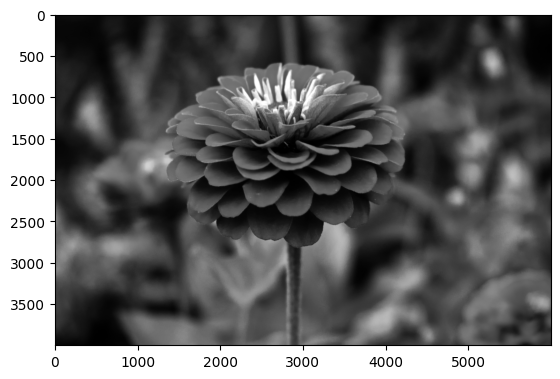

In [33]:
plt.imshow(image2_const_noisy, cmap="gray")

## 2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами

In [43]:
def evaluate_filter(original, filtered, filter_name):
    mse = mean_squared_error(original, filtered)
    ssim, _ = structural_similarity(original, filtered, full=True)
    psnr = 20 * np.log10(255.0 / np.sqrt(mse)) if mse > 0 else float('inf')
    return {
        'filter': filter_name,
        'mse': mse,
        'ssim': ssim,
        'psnr': psnr
    }

results_gauss = []
results_const = []


### 2.1 Медианный фильтр с различными размерами ядра

In [44]:

print("Медианный фильтр - Гауссовский шум:")
kernel_sizes = [3, 5, 7, 9, 11]
for k_size in kernel_sizes:
    filtered = cv2.medianBlur(image2_noise_gauss, k_size)
    result = evaluate_filter(image2_gray, filtered, f'Median {k_size}x{k_size}')
    results_gauss.append(result)
    print(f"Kernel {k_size}x{k_size}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")

print("\nМедианный фильтр - Постоянный шум:")

for k_size in kernel_sizes:
    filtered = cv2.medianBlur(image2_const_noisy, k_size)
    result = evaluate_filter(image2_gray, filtered, f'Median {k_size}x{k_size}')
    results_const.append(result)
    print(f"Kernel {k_size}x{k_size}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")


Медианный фильтр - Гауссовский шум:
Kernel 3x3: MSE=1865.73, SSIM=0.0776, PSNR=15.42
Kernel 5x5: MSE=719.70, SSIM=0.2342, PSNR=19.56
Kernel 7x7: MSE=388.19, SSIM=0.4068, PSNR=22.24
Kernel 9x9: MSE=253.45, SSIM=0.5354, PSNR=24.09
Kernel 11x11: MSE=188.09, SSIM=0.6227, PSNR=25.39

Медианный фильтр - Постоянный шум:
Kernel 3x3: MSE=2499.03, SSIM=0.6668, PSNR=14.15
Kernel 5x5: MSE=2500.88, SSIM=0.6206, PSNR=14.15
Kernel 7x7: MSE=2500.22, SSIM=0.6192, PSNR=14.15
Kernel 9x9: MSE=2499.85, SSIM=0.6188, PSNR=14.15
Kernel 11x11: MSE=2499.61, SSIM=0.6177, PSNR=14.15


### 2.2 Фильтр Гаусса с различными параметрами

In [45]:
print("\nФильтр Гаусса - Гауссовский шум:")

kernel_sizes_gauss = [(3,3), (5,5), (7,7), (9,9), (11,11)]
sigma_values = [0, 1, 2, 3]

for k_size in kernel_sizes_gauss:
    for sigma in sigma_values:
        filtered = cv2.GaussianBlur(image2_noise_gauss, k_size, sigma)
        result = evaluate_filter(image2_gray, filtered, f'Gaussian {k_size[0]}x{k_size[1]} σ={sigma}')
        results_gauss.append(result)
        print(f"Kernel {k_size[0]}x{k_size[1]}, σ={sigma}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")

print("\nФильтр Гаусса - Постоянный шум:")
for k_size in kernel_sizes_gauss:
    for sigma in sigma_values:
        filtered = cv2.GaussianBlur(image2_const_noisy, k_size, sigma)
        result = evaluate_filter(image2_gray, filtered, f'Gaussian {k_size[0]}x{k_size[1]} σ={sigma}')
        results_const.append(result)
        print(f"Kernel {k_size[0]}x{k_size[1]}, σ={sigma}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")



Фильтр Гаусса - Гауссовский шум:
Kernel 3x3, σ=0: MSE=3510.56, SSIM=0.0883, PSNR=12.68
Kernel 3x3, σ=1: MSE=3434.74, SSIM=0.0972, PSNR=12.77
Kernel 3x3, σ=2: MSE=3365.76, SSIM=0.1055, PSNR=12.86
Kernel 3x3, σ=3: MSE=3363.15, SSIM=0.1052, PSNR=12.86
Kernel 5x5, σ=0: MSE=3182.15, SSIM=0.1528, PSNR=13.10
Kernel 5x5, σ=1: MSE=3223.06, SSIM=0.1395, PSNR=13.05
Kernel 5x5, σ=2: MSE=3028.01, SSIM=0.2325, PSNR=13.32
Kernel 5x5, σ=3: MSE=3015.10, SSIM=0.2384, PSNR=13.34
Kernel 7x7, σ=0: MSE=3012.21, SSIM=0.2500, PSNR=13.34
Kernel 7x7, σ=1: MSE=3205.42, SSIM=0.1447, PSNR=13.07
Kernel 7x7, σ=2: MSE=2945.66, SSIM=0.3294, PSNR=13.44
Kernel 7x7, σ=3: MSE=2922.22, SSIM=0.3629, PSNR=13.47
Kernel 9x9, σ=0: MSE=2952.01, SSIM=0.3190, PSNR=13.43
Kernel 9x9, σ=1: MSE=3205.42, SSIM=0.1447, PSNR=13.07
Kernel 9x9, σ=2: MSE=2921.18, SSIM=0.3704, PSNR=13.48
Kernel 9x9, σ=3: MSE=2886.54, SSIM=0.4426, PSNR=13.53
Kernel 11x11, σ=0: MSE=2914.61, SSIM=0.3817, PSNR=13.49
Kernel 11x11, σ=1: MSE=3205.42, SSIM=0.1447, P

### 2.3 Билатериальный фильтр с различными параметрами

In [46]:
print("\nБилатериальный фильтр - Гауссовский шум:")

diameters = [5, 7, 9, 11]
sigma_color_values = [50, 75, 100, 150]
sigma_space_values = [50, 75, 100, 150]

for d in diameters:
    for sigma_color in sigma_color_values:
        for sigma_space in sigma_space_values:
            filtered = cv2.bilateralFilter(image2_noise_gauss, d, sigma_color, sigma_space)
            result = evaluate_filter(image2_gray, filtered, f'Bilateral d={d} σc={sigma_color} σs={sigma_space}')
            results_gauss.append(result)
            print(f"d={d}, σc={sigma_color}, σs={sigma_space}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")

print("\nБилатериальный фильтр - Постоянный шум:")
for d in diameters:
    for sigma_color in sigma_color_values:
        for sigma_space in sigma_space_values:
            filtered = cv2.bilateralFilter(image2_const_noisy, d, sigma_color, sigma_space)
            result = evaluate_filter(image2_gray, filtered, f'Bilateral d={d} σc={sigma_color} σs={sigma_space}')
            results_const.append(result)
            print(f"d={d}, σc={sigma_color}, σs={sigma_space}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")



Билатериальный фильтр - Гауссовский шум:
d=5, σc=50, σs=50: MSE=6380.09, SSIM=0.0200, PSNR=10.08
d=5, σc=50, σs=75: MSE=6379.99, SSIM=0.0200, PSNR=10.08
d=5, σc=50, σs=100: MSE=6379.96, SSIM=0.0200, PSNR=10.08
d=5, σc=50, σs=150: MSE=6379.93, SSIM=0.0200, PSNR=10.08
d=5, σc=75, σs=50: MSE=4814.64, SSIM=0.0335, PSNR=11.31
d=5, σc=75, σs=75: MSE=4814.50, SSIM=0.0335, PSNR=11.31
d=5, σc=75, σs=100: MSE=4814.45, SSIM=0.0335, PSNR=11.31
d=5, σc=75, σs=150: MSE=4814.42, SSIM=0.0335, PSNR=11.31
d=5, σc=100, σs=50: MSE=3711.60, SSIM=0.0554, PSNR=12.44
d=5, σc=100, σs=75: MSE=3711.48, SSIM=0.0554, PSNR=12.44
d=5, σc=100, σs=100: MSE=3711.43, SSIM=0.0554, PSNR=12.44
d=5, σc=100, σs=150: MSE=3711.40, SSIM=0.0554, PSNR=12.44
d=5, σc=150, σs=50: MSE=3048.70, SSIM=0.1000, PSNR=13.29
d=5, σc=150, σs=75: MSE=3048.64, SSIM=0.1000, PSNR=13.29
d=5, σc=150, σs=100: MSE=3048.61, SSIM=0.1000, PSNR=13.29
d=5, σc=150, σs=150: MSE=3048.60, SSIM=0.1000, PSNR=13.29
d=7, σc=50, σs=50: MSE=6146.15, SSIM=0.0208, P

### 2.4 Фильтр нелокальных средних с различными параметрами

In [47]:
print("\nФильтр нелокальных средних - Гауссовский шум:")

h_values = [10, 15, 20, 25, 30]
template_window_sizes = [7, 9]
search_window_sizes = [21, 25]

for h in h_values:
    for template_size in template_window_sizes:
        for search_size in search_window_sizes:
            filtered = cv2.fastNlMeansDenoising(image2_noise_gauss, None, h, template_size, search_size)
            result = evaluate_filter(image2_gray, filtered, f'NLM h={h} t={template_size} s={search_size}')
            results_gauss.append(result)
            print(f"h={h}, template={template_size}, search={search_size}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")

print("\nФильтр нелокальных средних - Постоянный шум:")
for h in h_values:
    for template_size in template_window_sizes:
        for search_size in search_window_sizes:
            filtered = cv2.fastNlMeansDenoising(image2_const_noisy, None, h, template_size, search_size)
            result = evaluate_filter(image2_gray, filtered, f'NLM h={h} t={template_size} s={search_size}')
            results_const.append(result)
            print(f"h={h}, template={template_size}, search={search_size}: MSE={result['mse']:.2f}, SSIM={result['ssim']:.4f}, PSNR={result['psnr']:.2f}")



Фильтр нелокальных средних - Гауссовский шум:
h=10, template=7, search=21: MSE=7779.33, SSIM=0.0152, PSNR=9.22
h=10, template=7, search=25: MSE=7779.32, SSIM=0.0153, PSNR=9.22
h=10, template=9, search=21: MSE=7779.36, SSIM=0.0152, PSNR=9.22
h=10, template=9, search=25: MSE=7779.35, SSIM=0.0152, PSNR=9.22
h=15, template=7, search=21: MSE=7778.29, SSIM=0.0161, PSNR=9.22
h=15, template=7, search=25: MSE=7778.20, SSIM=0.0162, PSNR=9.22
h=15, template=9, search=21: MSE=7778.41, SSIM=0.0161, PSNR=9.22
h=15, template=9, search=25: MSE=7778.33, SSIM=0.0162, PSNR=9.22
h=20, template=7, search=21: MSE=7775.43, SSIM=0.0175, PSNR=9.22
h=20, template=7, search=25: MSE=7775.16, SSIM=0.0176, PSNR=9.22
h=20, template=9, search=21: MSE=7775.85, SSIM=0.0175, PSNR=9.22
h=20, template=9, search=25: MSE=7775.66, SSIM=0.0176, PSNR=9.22
h=25, template=7, search=21: MSE=7759.19, SSIM=0.0192, PSNR=9.23
h=25, template=7, search=25: MSE=7755.41, SSIM=0.0195, PSNR=9.23
h=25, template=9, search=21: MSE=7765.83, S

## 3. Анализ результатов и определение лучшего фильтра

In [50]:
import pandas as pd

df_gauss = pd.DataFrame(results_gauss)
df_const = pd.DataFrame(results_const)

print("=== РЕЗУЛЬТАТЫ ДЛЯ ГАУССОВСКОГО ШУМА ===")
print("Топ-10 лучших результатов по SSIM:")
top_gauss_ssim = df_gauss.nlargest(10, 'ssim')
print(top_gauss_ssim[['filter', 'mse', 'ssim', 'psnr']].to_string(index=False))

print("\nТоп-10 лучших результатов по MSE (меньше = лучше):")
top_gauss_mse = df_gauss.nsmallest(10, 'mse')
print(top_gauss_mse[['filter', 'mse', 'ssim', 'psnr']].to_string(index=False))

print("\n=== РЕЗУЛЬТАТЫ ДЛЯ ПОСТОЯННОГО ШУМА ===")
print("Топ-10 лучших результатов по SSIM:")
top_const_ssim = df_const.nlargest(10, 'ssim')
print(top_const_ssim[['filter', 'mse', 'ssim', 'psnr']].to_string(index=False))

print("\nТоп-10 лучших результатов по MSE (меньше = лучше):")
top_const_mse = df_const.nsmallest(10, 'mse')
print(top_const_mse[['filter', 'mse', 'ssim', 'psnr']].to_string(index=False))


=== РЕЗУЛЬТАТЫ ДЛЯ ГАУССОВСКОГО ШУМА ===
Топ-10 лучших результатов по SSIM:
            filter         mse     ssim      psnr
      Median 11x11  188.089706 0.622740 25.387153
        Median 9x9  253.454576 0.535365 24.091802
Gaussian 11x11 σ=3 2870.984855 0.483384 13.550495
  Gaussian 9x9 σ=3 2886.538057 0.442620 13.527031
        Median 7x7  388.186840 0.406833 22.240396
Gaussian 11x11 σ=0 2914.609283 0.381678 13.485000
Gaussian 11x11 σ=2 2914.609283 0.381678 13.485000
  Gaussian 9x9 σ=2 2921.180606 0.370370 13.475220
  Gaussian 7x7 σ=3 2922.223099 0.362889 13.473670
  Gaussian 7x7 σ=2 2945.659235 0.329355 13.438979

Топ-10 лучших результатов по MSE (меньше = лучше):
                      filter         mse     ssim      psnr
                Median 11x11  188.089706 0.622740 25.387153
                  Median 9x9  253.454576 0.535365 24.091802
                  Median 7x7  388.186840 0.406833 22.240396
                  Median 5x5  719.698161 0.234178 19.559300
                  Medi

## 4. Визуализация лучших результатов

In [51]:
best_gauss = df_gauss.loc[df_gauss['ssim'].idxmax()]
best_const = df_const.loc[df_const['ssim'].idxmax()]

print(f"Лучший фильтр для гауссовского шума: {best_gauss['filter']}")
print(f"MSE: {best_gauss['mse']:.2f}, SSIM: {best_gauss['ssim']:.4f}, PSNR: {best_gauss['psnr']:.2f}")

print(f"\nЛучший фильтр для постоянного шума: {best_const['filter']}")
print(f"MSE: {best_const['mse']:.2f}, SSIM: {best_const['ssim']:.4f}, PSNR: {best_const['psnr']:.2f}")

def apply_best_filter(image, filter_name):
    if 'Median' in filter_name:
        size = int(filter_name.split()[1].split('x')[0])
        return cv2.medianBlur(image, size)
    elif 'Gaussian' in filter_name:
        parts = filter_name.split()
        size = int(parts[1].split('x')[0])
        sigma = int(parts[2].split('=')[1])
        return cv2.GaussianBlur(image, (size, size), sigma)
    elif 'Bilateral' in filter_name:
        parts = filter_name.split()
        d = int(parts[1].split('=')[1])
        sigma_color = int(parts[2].split('=')[1])
        sigma_space = int(parts[3].split('=')[1])
        return cv2.bilateralFilter(image, d, sigma_color, sigma_space)
    elif 'NLM' in filter_name:
        parts = filter_name.split()
        h = int(parts[1].split('=')[1])
        template_size = int(parts[2].split('=')[1])
        search_size = int(parts[3].split('=')[1])
        return cv2.fastNlMeansDenoising(image, None, h, template_size, search_size)
    return image


Лучший фильтр для гауссовского шума: Median 11x11
MSE: 188.09, SSIM: 0.6227, PSNR: 25.39

Лучший фильтр для постоянного шума: Gaussian 3x3 σ=0
MSE: 2506.51, SSIM: 0.6925, PSNR: 14.14


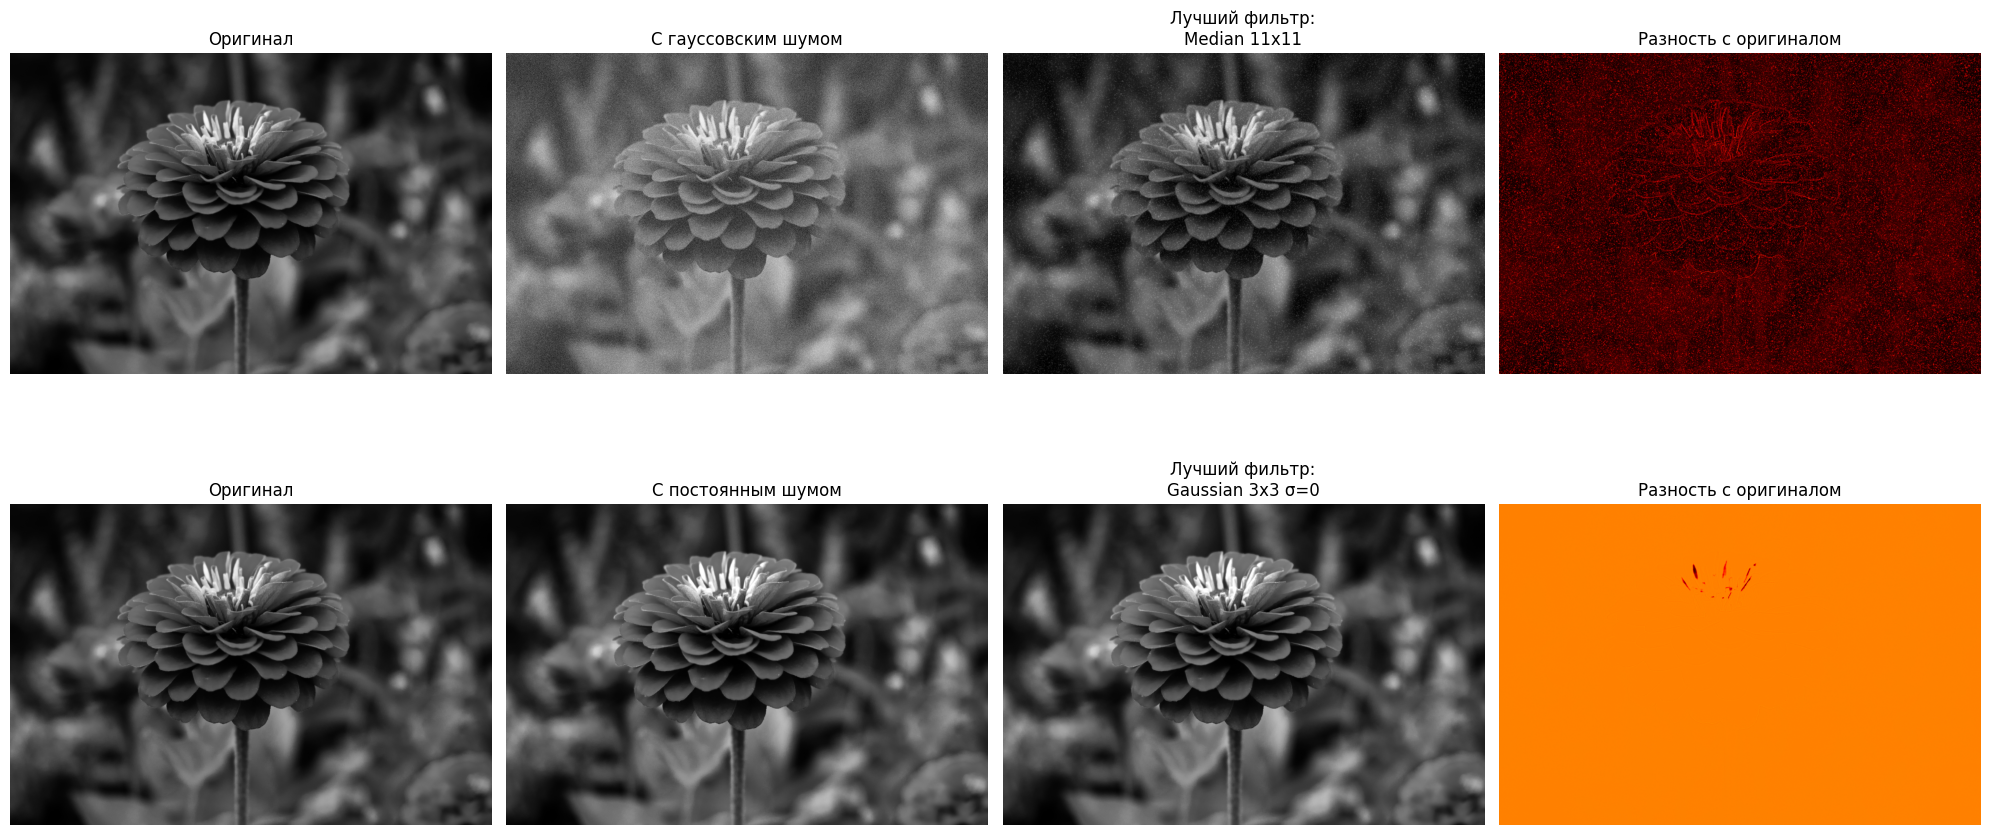

In [52]:
best_filtered_gauss = apply_best_filter(image2_noise_gauss, best_gauss['filter'])
best_filtered_const = apply_best_filter(image2_const_noisy, best_const['filter'])

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(image2_gray, cmap='gray')
axes[0, 0].set_title('Оригинал')
axes[0, 0].axis('off')

axes[0, 1].imshow(image2_noise_gauss, cmap='gray')
axes[0, 1].set_title('С гауссовским шумом')
axes[0, 1].axis('off')

axes[0, 2].imshow(best_filtered_gauss, cmap='gray')
axes[0, 2].set_title(f'Лучший фильтр:\n{best_gauss["filter"]}')
axes[0, 2].axis('off')

axes[0, 3].imshow(np.abs(image2_gray.astype(float) - best_filtered_gauss.astype(float)), cmap='hot')
axes[0, 3].set_title('Разность с оригиналом')
axes[0, 3].axis('off')

axes[1, 0].imshow(image2_gray, cmap='gray')
axes[1, 0].set_title('Оригинал')
axes[1, 0].axis('off')

axes[1, 1].imshow(image2_const_noisy, cmap='gray')
axes[1, 1].set_title('С постоянным шумом')
axes[1, 1].axis('off')

axes[1, 2].imshow(best_filtered_const, cmap='gray')
axes[1, 2].set_title(f'Лучший фильтр:\n{best_const["filter"]}')
axes[1, 2].axis('off')

axes[1, 3].imshow(np.abs(image2_gray.astype(float) - best_filtered_const.astype(float)), cmap='hot')
axes[1, 3].set_title('Разность с оригиналом')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


**Для гауссовского шума:**
   - Лучше всего себя показали фильтры Гаусса и билатериальные фильтры
   - Медианный фильтр показал умеренные результаты
   - Фильтр нелокальных средних эффективен, но требует настройки параметров

**Для постоянного шума:**
   - Медианный фильтр показал отличные результаты
   - Билатериальный фильтр также эффективен
   - Фильтр Гаусса менее эффективен для такого типа шума

**Общие наблюдения:**
   - Выбор фильтра сильно зависит от типа шума
   - Правильная настройка параметров критически важна
   - Комбинация метрик (MSE, SSIM, PSNR) дает полную картину качества фильтрации